# 2. Visualization

## 2.2. ORCID prevalence

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # version 3.5.2
import pickle
import operator
from itertools import groupby

In [3]:
authors = pd.read_pickle("./data/EU27_authors_with_all_taxonomic_articles.pkl")
authors

,Index,article_id,author_position,author_id,author_display_name,orcid,raw_affiliation_string,inst_id,inst_display_name,ror,...,is_in_doaj,source_host_organization,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,is_oa,oa_status,oa_url,any_repository_has_fulltext
0,0,https://openalex.org/W2282635459,first,https://openalex.org/A2528062669,Matteo Vecchi,https://orcid.org/0000-0002-7995-6827,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
1,1,https://openalex.org/W2282635459,middle,https://openalex.org/A2143576881,Michele Cesari,https://orcid.org/0000-0001-8857-3791,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
2,2,https://openalex.org/W2282635459,middle,https://openalex.org/A4360091361,Roberto Bertolani,None,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
3,3,https://openalex.org/W2282635459,middle,https://openalex.org/A4335463764,K. Ingemar Jönsson,None,"School of Education and Environment, Kristians...",https://openalex.org/I193278943,Kristianstad University,https://ror.org/00tkrft03,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
4,4,https://openalex.org/W2282635459,middle,https://openalex.org/A2077559806,Lorena Rebecchi,https://orcid.org/0000-0002-0702-1846,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25098,49489,https://openalex.org/W4253410054,last,https://openalex.org/A2118604301,Josef Starý,https://orcid.org/0000-0002-9440-4254,Institute of Soil Biology,https://openalex.org/I4210124224,Institute of Soil Biology,https://ror.org/02tz8r820,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,False,closed,None,False
25099,49490,https://openalex.org/W4254963337,first,https://openalex.org/A4357507713,Maciej Skoracki,None,"Department of Animal Morphology, Adam Mickiewi...",https://openalex.org/I173161963,University of Prešov,https://ror.org/02ndfsn03,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,True,bronze,https://doi.org/10.21684/0132-8077-2019-27-2-2...,False
25100,49496,https://openalex.org/W4255590455,last,https://openalex.org/A4355237428,Jenő Kontschán,None,"Plant Protection Institute, Centre for Agricul...",https://openalex.org/I4210156273,Plant Protection Institute,https://ror.org/052t9a145,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,True,bronze,https://doi.org/10.21684/0132-8077-2019-27-2-1...,True
25101,49497,https://openalex.org/W4285411966,f

In [4]:
authors_per_journal = authors.drop_duplicates(subset=["author_id", "inst_id"])
authors_per_journal

,Index,article_id,author_position,author_id,author_display_name,orcid,raw_affiliation_string,inst_id,inst_display_name,ror,...,is_in_doaj,source_host_organization,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,is_oa,oa_status,oa_url,any_repository_has_fulltext
0,0,https://openalex.org/W2282635459,first,https://openalex.org/A2528062669,Matteo Vecchi,https://orcid.org/0000-0002-7995-6827,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
1,1,https://openalex.org/W2282635459,middle,https://openalex.org/A2143576881,Michele Cesari,https://orcid.org/0000-0001-8857-3791,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
2,2,https://openalex.org/W2282635459,middle,https://openalex.org/A4360091361,Roberto Bertolani,None,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
3,3,https://openalex.org/W2282635459,middle,https://openalex.org/A4335463764,K. Ingemar Jönsson,None,"School of Education and Environment, Kristians...",https://openalex.org/I193278943,Kristianstad University,https://ror.org/00tkrft03,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
4,4,https://openalex.org/W2282635459,middle,https://openalex.org/A2077559806,Lorena Rebecchi,https://orcid.org/0000-0002-0702-1846,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25089,49474,https://openalex.org/W3114448862,first,https://openalex.org/A3115459986,Uusitalo Matti,None,University of Turku,https://openalex.org/I155660961,University of Turku,https://ror.org/05vghhr25,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,True,bronze,https://doi.org/10.21684/0132-8077-2020-28-2-1...,False
25090,49475,https://openalex.org/W3117082141,first,https://openalex.org/A2653154378,Ilse Bartsch,None,Forschungsinstitut Senckenberg,https://openalex.org/I2802304881,German Research Institute for Public Administr...,https://ror.org/01r70sq06,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,True,bronze,https://doi.org/10.21684/0132-8077-2020-28-2-1...,False
25099,49490,https://openalex.org/W4254963337,first,https://openalex.org/A4357507713,Maciej Skoracki,None,"Department of Animal Morphology, Adam Mickiewi...",https://openalex.org/I173161963,University of Prešov,https://ror.org/02ndfsn03,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,True,bronze,https://doi.org/10.21684/0132-8077-2019-27-2-2...,False
25101,49497,https://openalex.org/W42854119

In [5]:
authors_per_journal.columns

Index(['Index', 'article_id', 'author_position', 'author_id',
       'author_display_name', 'orcid', 'raw_affiliation_string', 'inst_id',
       'inst_display_name', 'ror', 'inst_country_code', 'inst_type', 'id',
       'doi', 'title', 'display_name', 'publication_year', 'publication_date',
       'ids', 'language', 'primary_location', 'type', 'open_access',
       'authorships', 'corresponding_author_ids',
       'corresponding_institution_ids', 'apc_payment', 'cited_by_count',
       'biblio', 'is_retracted', 'is_paratext', 'concepts', 'mesh',
       'locations_count', 'locations', 'best_oa_location', 'grants',
       'referenced_works', 'related_works', 'ngrams_url',
       'abstract_inverted_index', 'cited_by_api_url', 'counts_by_year',
       'updated_date', 'created_date', 'is_authors_truncated',
       'location_is_oa', 'location_landing_page_url', 'location_pdf_url',
       'location_source', 'location_license', 'location_version', 'source_id',
       'source_display_name', 'so

In [10]:
# get single authorship PER JOURNAL
journal_names = sorted(list(set(authors_per_journal["source_display_name"])))
data_plot = pd.DataFrame(columns = journal_names, index = ["authors", "orcids"])

for j in journal_names:
    df = authors_per_journal[authors_per_journal["source_display_name"]==j]
    
    data_plot.at["authors", j] = len(df.index)
    data_plot.at["orcids", j] = len(df.index) - df["orcid"].count(None) 
    # watch out, "count(None)" actually counts how many values are NOT None

data_plot

,Acarina,Acarologia,Acta Entomologica Musei Nationalis Pragae,Adansonia,African Invertebrates,African Natural History,Annales Botanici Fennici,Annales De La Societe Entomologique De France,Annales Zoologici,Aquatic Insects,...,Tulane Studies in Geology and Paleontology,Willdenowia,ZooKeys,Zoologica Scripta,Zoologischer Anzeiger,Zoosystema,Zoosystematica Rossica,Zoosystematics and Evolution,Zootaxa,persian journal of acarology
authors,5,115,63,35,13,1,82,66,102,38,...,1,133,291,208,193,77,19,8,2918,8
orcids,5,94,56,30,12,0,67,54,90,30,...,1,113,248,170,155,65,16,7,2393,7


In [7]:
sum(data_plot.loc["authors"])

11676

In [8]:
sum(data_plot.loc["orcids"])

9267

In [13]:
# removing journals with fewer than 20 taxonomists to simplify graph 
data_plot = data_plot.loc[:, (data_plot>=20).any()]

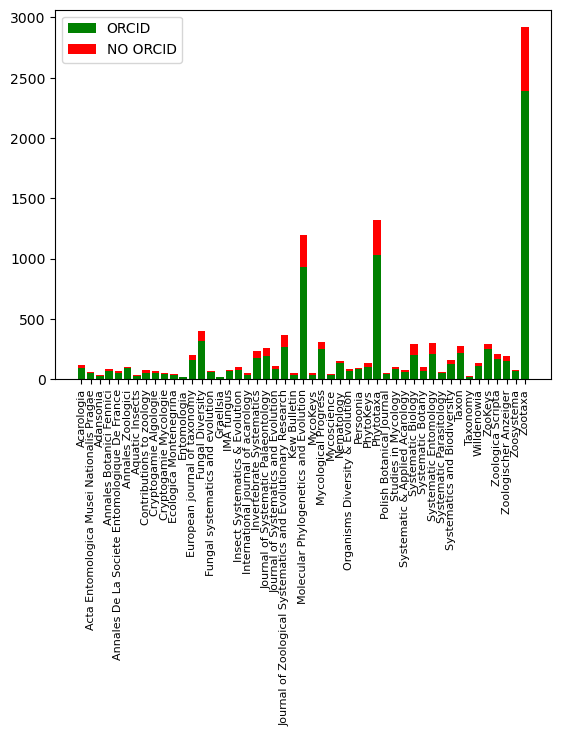

<Figure size 640x480 with 0 Axes>

In [14]:
labels = data_plot.keys()
no_orcid = list(map(operator.sub, list(data_plot.loc["authors",]), list(data_plot.loc["orcids",])))

fig, ax = plt.subplots()

ax.bar(labels, data_plot.loc["orcids",],
       label="ORCID", color="green")
ax.bar(labels, no_orcid, bottom=data_plot.loc["orcids",],
       label="NO ORCID", color="red")
ax.legend()

plt.xticks(rotation=90, ha="center", fontsize=8)
plt.show()

plt.savefig("./figures/absolute_orcid_authors_journals.png")

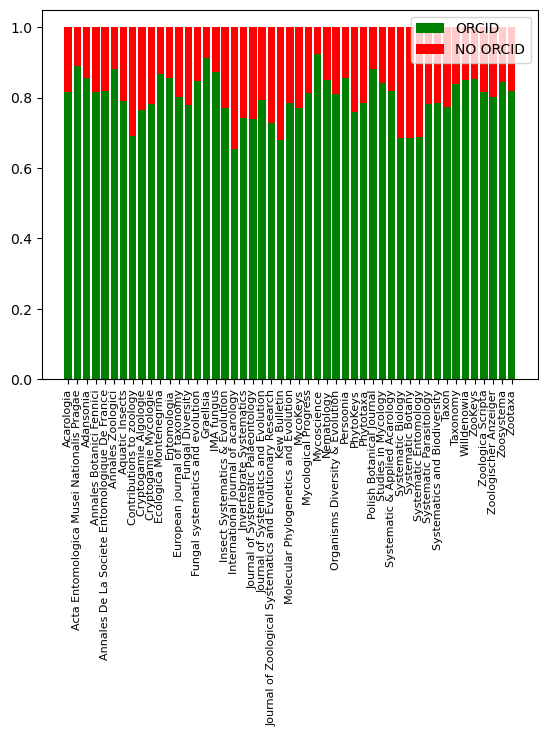

<Figure size 640x480 with 0 Axes>

In [16]:
perc_orcids = np.divide(data_plot.loc["orcids",], data_plot.loc["authors",])
perc_no_orcids = 1 - perc_orcids

fig, ax = plt.subplots()

ax.bar(labels, perc_orcids,
       label="ORCID", color="green")
ax.bar(labels, perc_no_orcids, bottom=perc_orcids,
       label="NO ORCID", color="red")
ax.legend()

plt.xticks(rotation=90, ha="center", fontsize=8)
plt.show()

plt.savefig("./figures/relative_orcid_authors_journals.png")